In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Basic

## Optimization

In [3]:
from scipy.optimize import minimize

Minimize $f(x) = (x-3)^2$


In [4]:
def func(x):
    return (x-3)**2

#x0 initial guess
res = minimize(func, x0=1)
print(res)
#res
res.x

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.2397920662551844e-16
        x: [ 3.000e+00]
      nit: 2
      jac: [-2.110e-08]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3


array([2.99999998])

In [5]:
#Un modo più compatto per definire una funzione
func=lambda x: (x-3)**2


#x0 initial guess
res = minimize(func, x0=10)
#res
res.x

array([2.99999999])

Minimize $f(x, y) = (x-1)^2 + (y-2.5)^2$ subject to

$$x-2y+2 \geq 0 $$
$$-x-2y+6 \geq 0$$
$$-x + 2y + 2 \geq 0$$
$$x \geq 0 $$
$$y \geq 0 $$


* 2D function takes in vector $x$
* Constraints must be specified as $g_i(x) \geq 0$
* Bounds specified as rectangular 

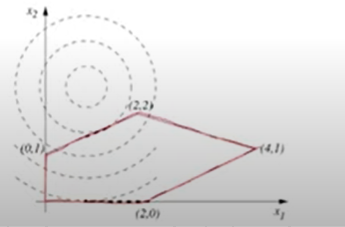
E' una parabola in 2D, il minimo sarebbe al vertice ma io voglio il minimo relativo nella zona rossa 

In [6]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: x[0]},
        {'type': 'ineq', 'fun': lambda x: x[1]})

#res = minimize(f, (2, 0), constraints=cons)
#res = minimize(f, (2, 0))
bnds = ((0, None), (None, 0))
res = minimize(f, (-1, 0),bounds=bnds)

In [7]:
res.x

array([1., 0.])

In [8]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
#Le ultime due condizioni possono essere considerate boundaries [0, Inf]
bnds  = ((0, None), (0, None))
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)
res.x

array([1.4, 1.7])

## Interpolation

Suppose you have the following data (I generate it here, but perhaps you collect $x$ and $y$ by means of some experiment)

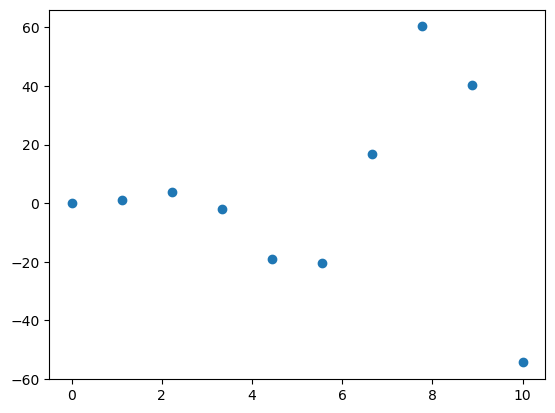

In [9]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

You want to know the values in between.

In [10]:
from scipy.interpolate import interp1d

In [11]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

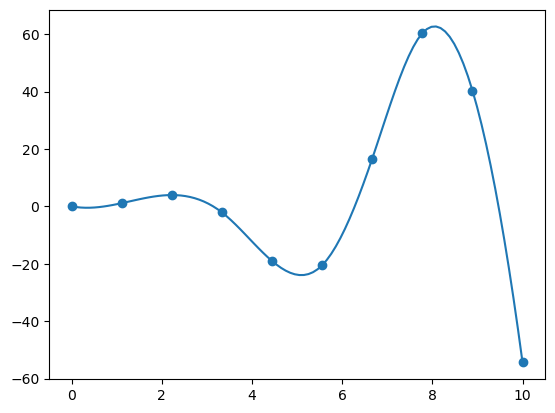

In [12]:
plt.plot(x_dense, y_dense)
plt.scatter(x, y)

-17.73581660317072


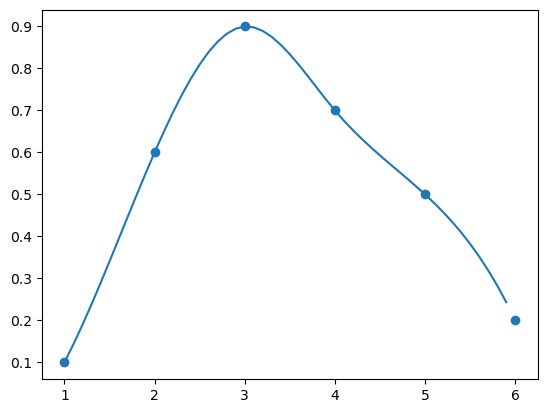

In [13]:
x=np.arange(1,7,1)
y=np.array([0.1,0.6,0.9,0.7,0.5,0.2])
plt.scatter(x,y)
ff = interp1d(x, y, kind='cubic')
x_dense = np.arange(1, 6, 0.1)
y_dense=ff(x_dense)
plt.plot(x_dense, y_dense)
print(f(4.35))

## Curve Fitting

Trivial Example

In [14]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

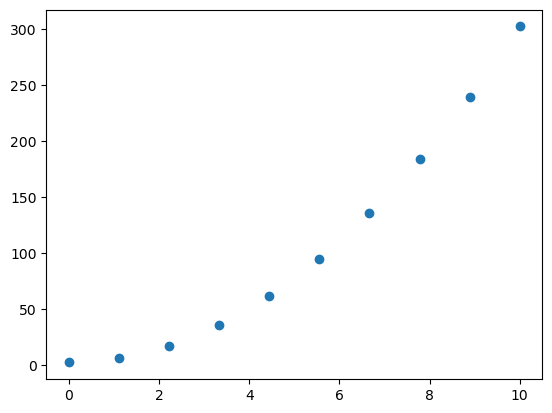

In [15]:
plt.scatter(x_data, y_data)

Want to fit the data to the curve $y = ax^2 + b$. The main goal here is determine the values of $a$ and $b$

In [16]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x**2 + b
#In popt fitted parameters, in pcov covariance of the parameters, p0 initial guess a=1, b=1
popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))
popt

array([3., 2.])

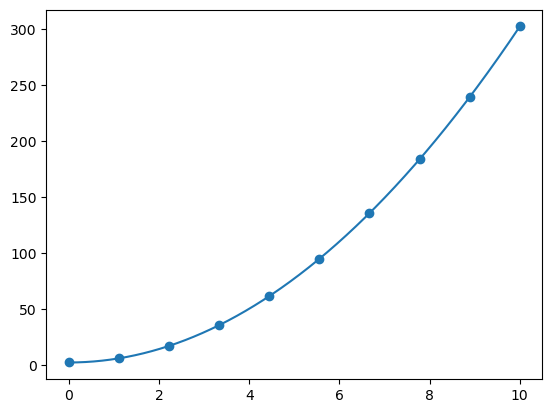

In [17]:
plt.scatter(x_data, y_data)
xx=np.linspace(0, 10, 3000)


plt.plot(xx,func(xx,popt[0],popt[1]))

The equation for spring motion is $y(t) = A\cos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data

In [18]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

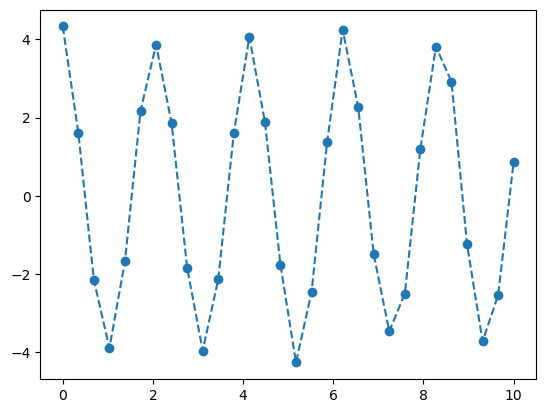

In [19]:
plt.plot(t_data,y_data,'o--')


$\omega = 2 \pi f$, $f=1/T$, and $T \approx 2$ seconds. Thus good initial guess is

* $\omega = 2 \pi / T = \pi$
* $A=4$
* $\phi = 0$

In [20]:
from scipy.optimize import curve_fit

def func(x, A, w, phi):
    return A*np.cos(w*x+phi)

popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi,0))
popt

array([3.94836219, 2.99899521, 0.10411352])

In [21]:
A, w, phi = popt


In [22]:
t = np.linspace(0, 10, 100)
y = func(t, A, w, phi)

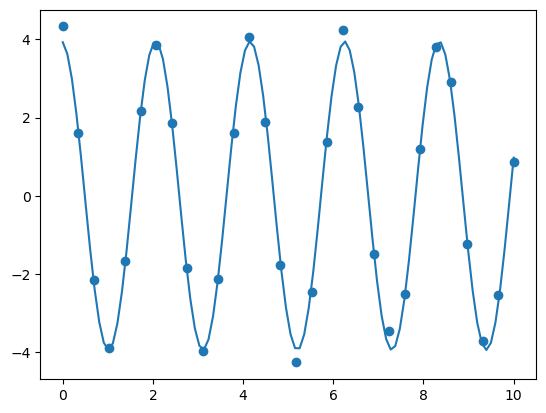

In [23]:
plt.scatter(t_data,y_data)
plt.plot(t,y)

The parameters

In [24]:
popt

array([3.94836219, 2.99899521, 0.10411352])

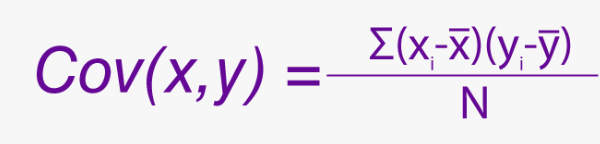

The estimated error on the parameters

In [25]:
pcov

array([[ 2.61882717e-03, -4.94131505e-06,  3.47404558e-05],
       [-4.94131505e-06,  1.85637335e-05, -9.60755036e-05],
       [ 3.47404558e-05, -9.60755036e-05,  6.63423791e-04]])

In [26]:
covv=np.sqrt(np.diag(pcov))
err_a=covv[0]
err_b=covv[1]

print('Errore su a è', err_a, 'errore su b è', err_b)

Errore su a è 0.05117447770925556 errore su b è 0.004308565132396145


## Special Functions

Legendre Polynomials $P_l(x)$: satisfy $(1-x^2)y'' -2xy'+l(l+1)y = 0$

* The angular component of the spherical Schrodinger Equation which permits non-infinite solutions
https://www.physics.udel.edu/~jim/PHYS309_16F/Class%20Notes/class_31.pdf

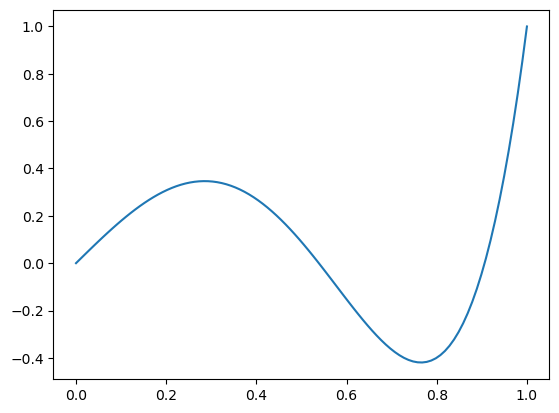

In [27]:
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(5)(x))
plt.show()

Bessel functions $J_{\alpha}(x)$: satisfy $x^2 y'' + xy' + (x^2-\alpha^2)y = 0$

* Laplace's Equation in Polar Coordinates

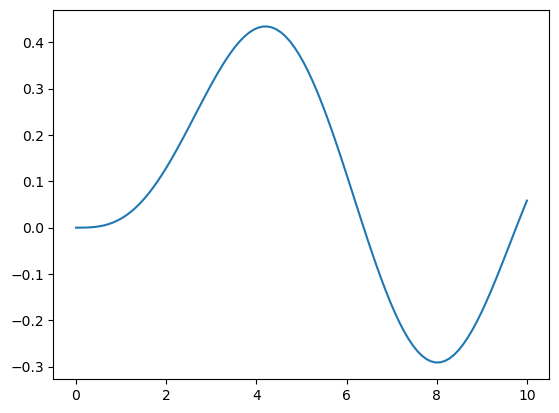

In [28]:
from scipy.special import jv
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3,x))
plt.show()

# Calculus

## Differentiation

In [29]:
from scipy.misc import derivative

<h4> Al contrario di numpy che lavorava su array qui definisco la funzione <h4>

<h2>np.gradient is only a numerical approximation, so it will introduce some error. Each time you call it, the errors will compound. I would be very surprised if the fifth derivative was as accurate as the first.<h2>
<h2> derivative in simpy is more accurate (in particular at higher orders) since it starts from an analytical function which needs however to be defined and known <h2>

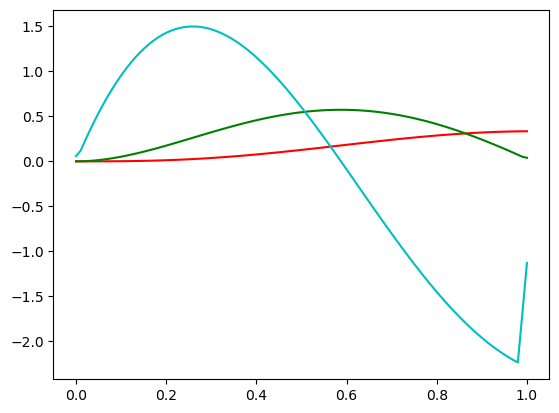

In [30]:
import numpy as np
def f(x):
    return x**2 * np.sin(2*x) *np.exp(-x)
x = np.linspace(0, 1, 100)
#Derivata prima
dydx = np.gradient(f(x),x)
#Derivata seconda
d2ydx2 = np.gradient(dydx,x)
plt.plot(x,f(x),'r')
plt.plot(x,dydx,'g')
plt.plot(x,d2ydx2,'c')

In [31]:
def f(x):
    return x**2 * np.sin(2*x) *np.exp(-x)
x = np.linspace(0, 1, 100)


C:\Users\lpers\AppData\Local\Temp\ipykernel_23472\2835984241.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6))
C:\Users\lpers\AppData\Local\Temp\ipykernel_23472\2835984241.py:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6, n=2))


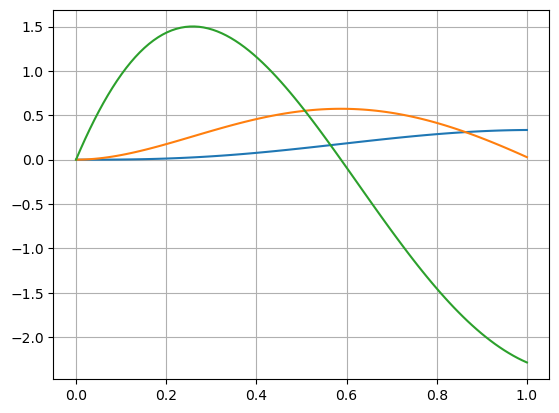

In [32]:
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx=1e-6))
#Derivata II
plt.plot(x, derivative(f, x, dx=1e-6, n=2))
plt.grid()

C:\Users\lpers\AppData\Local\Temp\ipykernel_23472\3662750793.py:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d2=derivative(f, x, dx=1e-6, n=2)


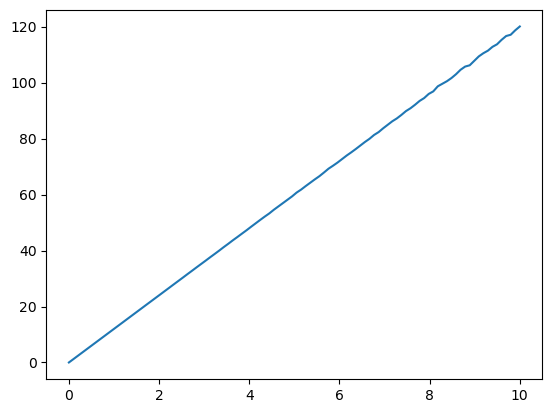

In [33]:
def f(x):
    return 2*x**3 +3*x +1
x = np.linspace(0, 10, 100)
d2=derivative(f, x, dx=1e-6, n=2)
#plt.plot(x,f(x))
plt.plot(x, d2)

## Ulteriore modo derivare in Scipy

https://findiff.readthedocs.io/en/latest/source/getstarted.html#first-derivatives

In [10]:
#it should be executed in a terminal
#pip install --upgrade findiff

#in Spyder usa invece
#conda install -c conda-forge findiff

In [1]:
from findiff import FinDiff

In [2]:
import numpy as np
x = np.linspace(0, 2*np.pi, 100)
dx = x[1] - x[0]
f = np.sin(x)

FinDiff objects behave like operators, so in order to apply them, you can simply call them on a numpy ndarray of any shape:

In [3]:
d_dx = FinDiff(0, dx)
df_dx = d_dx(f)

Now df_dx is a new numpy array with the same shape as f containing the first derivative with respect to the zeroth axis:

In [14]:
import matplotlib.pyplot as plt

In [15]:
print(df_dx)

[ 1.00134077  0.99731683  0.99128901  0.98126963  0.96729902  0.94943343
  0.92774481  0.9023205   0.87326285  0.84068889  0.80472976  0.76553028
  0.72324827  0.678054    0.63012944  0.57966758  0.52687159  0.47195409
  0.41513619  0.35664668  0.29672108  0.23560069  0.17353163  0.11076381
  0.04754998 -0.01585531 -0.07919676 -0.14221932 -0.2046692  -0.26629496
 -0.32684844 -0.38608581 -0.44376856 -0.4996644  -0.55354827 -0.6052032
 -0.65442119 -0.70100406 -0.74476423 -0.7855255  -0.82312373 -0.85740754
 -0.88823886 -0.91549357 -0.9390619  -0.95884896 -0.97477508 -0.98677612
 -0.99480376 -0.99882568 -0.99882568 -0.99480376 -0.98677612 -0.97477508
 -0.95884896 -0.9390619  -0.91549357 -0.88823886 -0.85740754 -0.82312373
 -0.7855255  -0.74476423 -0.70100406 -0.65442119 -0.6052032  -0.55354827
 -0.4996644  -0.44376856 -0.38608581 -0.32684844 -0.26629496 -0.2046692
 -0.14221932 -0.07919676 -0.01585531  0.04754998  0.11076381  0.17353163
  0.23560069  0.29672108  0.35664668  0.41513619  0.4

(0.0, 6.283185307179586)

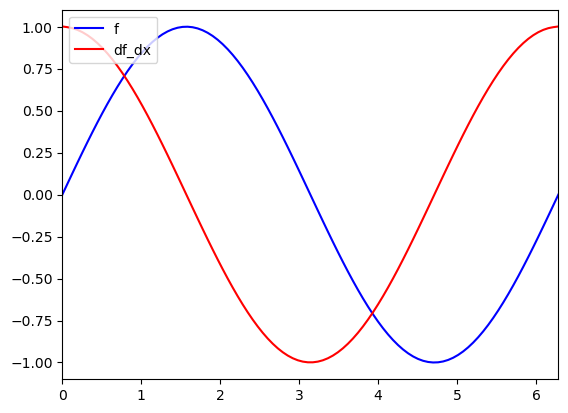

In [16]:
plt.plot(x,f, "-b", label="f")
plt.plot(x,df_dx, "-r", label="df_dx")
plt.legend(loc="upper left")
plt.xlim(0, 2*np.pi)

In [17]:
d2_dx2 = FinDiff(0, dx,2)
df2_dx2=d2_dx2(f)

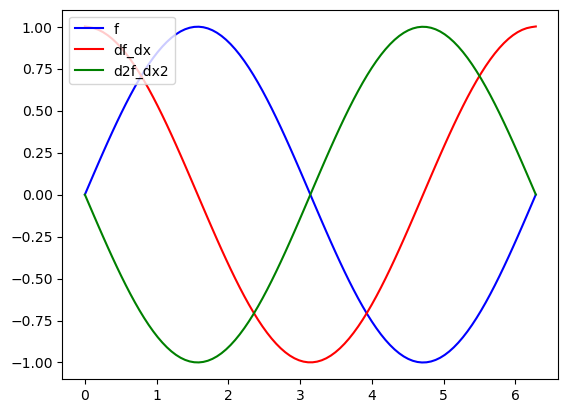

In [18]:
plt.plot(x,f, "-b", label="f")
plt.plot(x,df_dx, "-r", label="df_dx")
plt.plot(x,df2_dx2, "-g", label="d2f_dx2")
plt.legend(loc="upper left")

## Autovalori ed autovettori

In [9]:
from scipy.sparse.linalg import eigs

H=np.ones((5,5))

In [11]:
energies, states = eigs(H)
print(energies)
print(states)

[ 5.00000000e+00+0.j  1.14734539e-16+0.j  9.86076132e-32+0.j
  0.00000000e+00+0.j -4.86380468e-64+0.j]
[[-4.47213595e-01 -4.43967828e-01 -2.61651409e-16 -5.94126114e-33
   4.28171276e-17]
 [-4.47213595e-01 -6.40813725e-01 -8.66025404e-01  1.15464331e-16
  -2.15306790e-01]
 [-4.47213595e-01  3.61593851e-01  2.88675135e-01 -9.91950729e-17
  -7.19091634e-01]
 [-4.47213595e-01  3.61593851e-01  2.88675135e-01 -7.07106781e-01
   4.67199212e-01]
 [-4.47213595e-01  3.61593851e-01  2.88675135e-01  7.07106781e-01
   4.67199212e-01]]


C:\Users\lpers\AppData\Local\Temp\ipykernel_12316\985193972.py:1: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  energies, states = eigs(H)


## Integration

Single integrals

$$ \int_0^{1} x^2 \sin(2x) e^{-x} dx $$

In [34]:
x=np.linspace(0, 1,100)
y=x**2 * np.sin(2*x) * np.exp(-x)
integral=np.trapz(y,x)
integral

0.14558199976554867

In [35]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

In [36]:
integral

0.14558175869954834

In [37]:
from scipy.integrate import quad
import numpy as np
integrand = lambda x: np.exp(x**3)+2*x
integral, integral_error = quad(integrand, 1, 5)
print(integral)

2.594719708087735e+52


### Arrivati qui 18 aprile 2024

Double integrals

$$ \int_{0}^{1} \int_{-x}^{x^2} \sin(x+y^2) dy dx $$

In [38]:
from scipy.integrate import dblquad
integrand = lambda y, x: np.sin(x+y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

In [39]:
integral

0.590090324408853

## Differetial Equations

**First Order ODEs**

Air friction while falling

$$ v' - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0$$

In [40]:
from scipy.integrate import odeint

In [41]:
#devo definire la funzione nella forma dv/dt=v(t), alfa=-3 beta=5
def dvdt(v, t):
    return 3*v**2 - 5
v0 = 0

Solve differential equation

In [42]:
#Risolvo con t [0 1]
t = np.linspace(0, 1, 100)
sol = odeint(dvdt, v0, t)

In [43]:
sol


array([[ 0.        ],
       [-0.05047933],
       [-0.10080451],
       [-0.15082334],
       [-0.20038726],
       [-0.24935318],
       [-0.29758502],
       [-0.34495519],
       [-0.39134576],
       [-0.43664948],
       [-0.48077056],
       [-0.52362515],
       [-0.56514164],
       [-0.60526086],
       [-0.6439356 ],
       [-0.68113064],
       [-0.71682205],
       [-0.75099661],
       [-0.78365109],
       [-0.8147914 ],
       [-0.84443176],
       [-0.87259378],
       [-0.89930556],
       [-0.92460079],
       [-0.94851787],
       [-0.97109913],
       [-0.99239002],
       [-1.01243837],
       [-1.03129376],
       [-1.04900692],
       [-1.06562918],
       [-1.081212  ],
       [-1.0958066 ],
       [-1.10946355],
       [-1.12223249],
       [-1.13416195],
       [-1.14529906],
       [-1.15568941],
       [-1.16537698],
       [-1.17440397],
       [-1.18281086],
       [-1.19063623],
       [-1.19791686],
       [-1.20468768],
       [-1.21098179],
       [-1

Plot

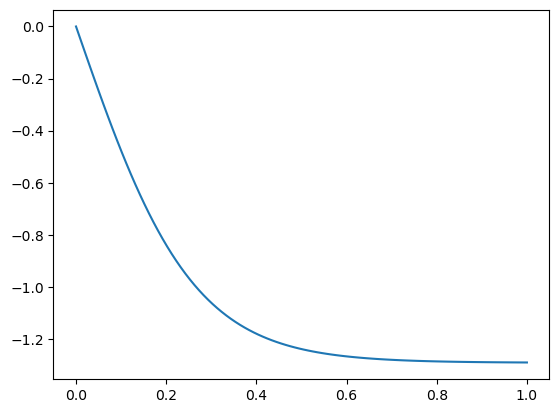

In [44]:

plt.plot(t, sol)

**Coupled first order ODEs**

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0$$
$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0$$

Letting $S=(y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The function $dS/dx$ can take in $S=(y_1, y_2)$ and $x$

In [45]:
def dSdx(S, x):
    y1, y2 = S
    
    return [y1 + y2**2  + 3*x,
           3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [46]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)

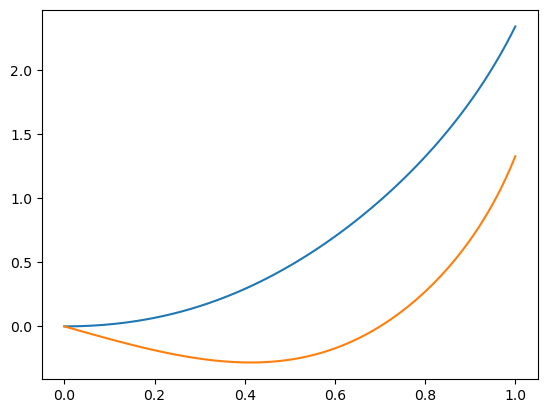

In [47]:
plt.plot(x, sol[:,0])
plt.plot(x, sol[:,1])

**Second Order ODEs**

Equation for a pendulum

$$\theta'' - \sin(\theta) = 0$$

Scipy can only solve coupled first order ODEs, but **any second order ODE can be turned into two coupled first order ODEs**. The same thing goes for higher order ODEs. 

Define $\omega = d\theta/dt$ so that one has the following coupled ODEs

$$d \omega / dt = \sin(\theta)$$
$$d \theta / dt = \omega $$

Let $S = (\theta, \omega)$

In [48]:
def dSdt(S, t):
    theta, omega = S
    return [omega,
           np.sin(theta)]
theta0 = np.pi/4
omega0 = 0
S0 = (theta0, omega0)

In [49]:
t = np.linspace(0, 100, 100)
sol = odeint(dSdt, S0, t)
theta, omega = sol.T

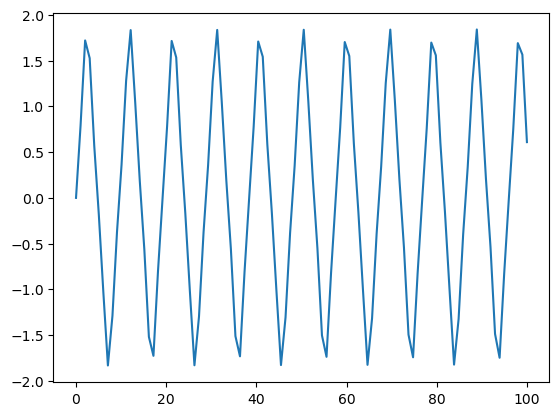

In [50]:
plt.plot(t, omega)
plt.show()

## Fourier Transforms

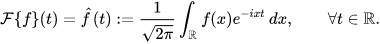

The discrete Fourier transform is defined as

$$y[k] = \sum_{n=0}^{N-1} e^{-2 \pi i n (k / N)} x[n] $$

* $k/N$ represents a specific frequency (dimensionless)
* can be converted to a frequency (Hz) if you know the spacing in $x$

(0.0, 10.0)

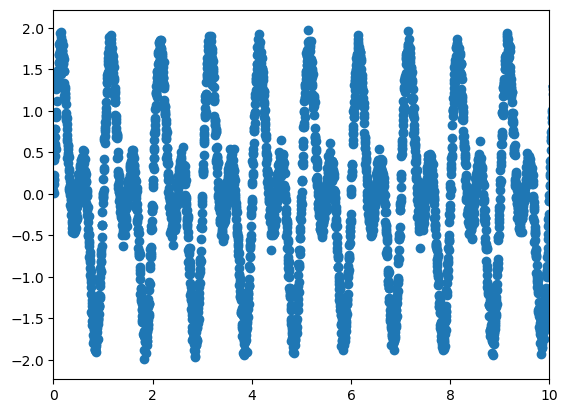

In [51]:
x = np.linspace(0, 10*np.pi, int(1e4))
#omega1= 2*pi e omega2= 4*pi
#f1= 1 e f2= 2
y = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x))
plt.scatter(x, y)
plt.xlim([0, 10])

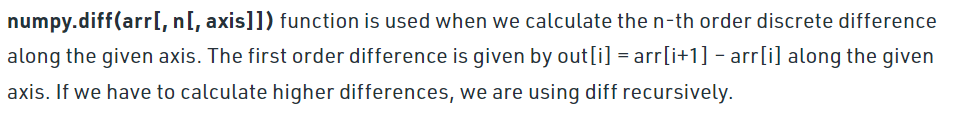

In [52]:
from scipy.fft import fft, fftfreq
N = len(y)
yf = fft(y)
#diff[0] mi dà il dt
#xf ha la dimensione di 1/x
dx=x[1]-x[0]
#xf = fftfreq(N, np.diff(x)[0])
xf = fftfreq(N, dx)

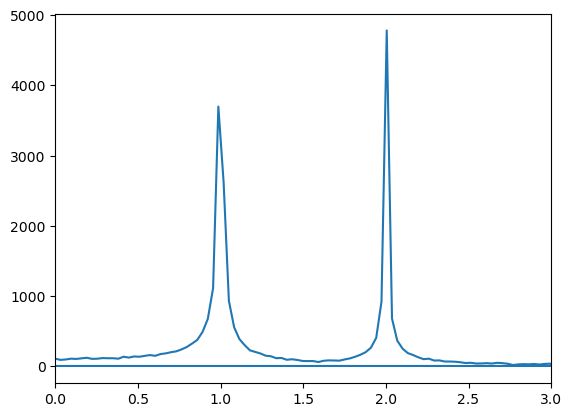

In [53]:
plt.plot(xf, np.abs(yf))
plt.xlim([0, 3])
#plt.xlim([-5, 5])
plt.show()

# Examples

**Example 1**. The energy required to get from point $\vec{r}_1$ to point $\vec{r}_2$ for a plane is given by

$$ E = \alpha \int_{C} \left| \frac{d\vec{r}}{dt} \right| dt - \int_C \vec{F} \cdot \frac{d\vec{r}}{dt}dt $$

Suppose that $\alpha=5$ and our start and ends points are $\vec{r}_1 = (0,0)$ and $\vec{r}_2 = (0, 10)$. On this particular day, the wind produces a force field $\vec{F} = (0, -2/(x+1)^2)$. Find the optimal value of $A$ in $\vec{r}(t) = A\sin(\pi t/10)\hat{x} + t\hat{y}$ that minimizes the work. 

Then $x=A\sin(\pi t/10)$, $y=t$, and

$$\left| \frac{d\vec{r}}{dt} \right| = \sqrt{1+(\pi A /10)^2 \cos^2(\pi t/10)}$$

$$\vec{F} \cdot d\vec{r} = \begin{bmatrix} 0 \\ -2/(A\sin(\pi t/10) +1)^2\\ \end{bmatrix} \cdot \begin{bmatrix} \pi A/10 \cos(\pi t/10)\\ 1\\ \end{bmatrix} = -2/(A\sin(\pi t/10) +1)^2 $$

so that

$$ E = \int_{0}^{10} \left(5\sqrt{1+(\pi A /10)^2 \cos^2(\pi t/10)} + \frac{2}{(A\sin(\pi t/10) +100)^2}  \right) dt$$

In [54]:
def f(A): 
    integrand = lambda t: (2 / (1 + np.abs(A*np.sin(np.pi*t/10)))**2 + (1+(np.pi*A/10)**2 * np.cos(np.pi * t / 10)**2))**0.2
    return quad(integrand, 0, 10)[0]
f(5)

11.781995516739533

In [55]:
def f(A): 
    integrand = lambda t: 2 / (1 + np.abs(A*np.sin(np.pi*t/10)))**2 + 5*np.sqrt(1+(np.pi*A/10)**2 * np.cos(np.pi * t / 10)**2)
    return quad(integrand, 0, 10)[0]

minimize(f, 0.001, method="CG")

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 59.166849997372964
       x: [ 1.426e+00]
     nit: 2
     jac: [ 0.000e+00]
    nfev: 17
    njev: 8

**Example 2**: Newton's law of cooling is

$$\frac{dT}{dt} = -k(T-T_s(t)) $$

where $T$ is the temperature of an object in the surroundings with temperature $T_s(t)$ (which may depend on time). Suppose $T$ represents the temperature of a shallow pool of water and $T_s(t)$ represents the temperature of outside. Find $T(t)$ given that you collected measurements of the outside:



In [56]:
#shorturl.at/CINZ7

t_m = np.array([ 0.,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
        5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
       10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
       15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
       20.86956522, 21.91304348, 22.95652174, 24.        ])

temp_m = np.array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
       291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
       302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675,
       298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
       287.8603625, 286.2259041, 284.6945461, 283.2322975])

Text(0, 0.5, 'Temperature [K]')

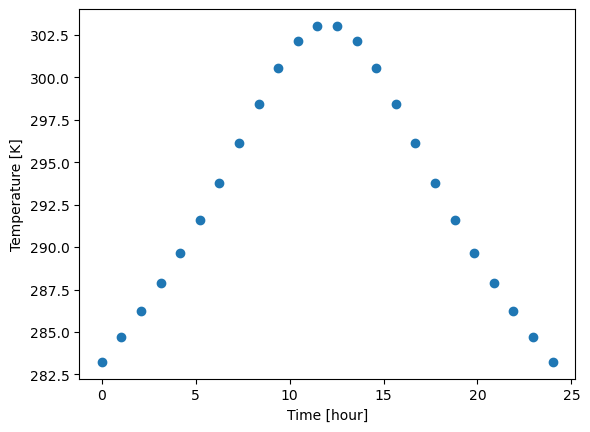

In [57]:
plt.scatter(t_m, temp_m)
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')

In [58]:
Ts = interp1d(t_m, temp_m, kind='cubic')
print(Ts(5))

291.190429470331


In [59]:
def dTdt(T, t):
    return -0.5*(T-Ts(t))

times = np.linspace(1, 23, 1000)
T0 = 284.6945461

In [60]:
sol = odeint(dTdt, T0, times).T[0]

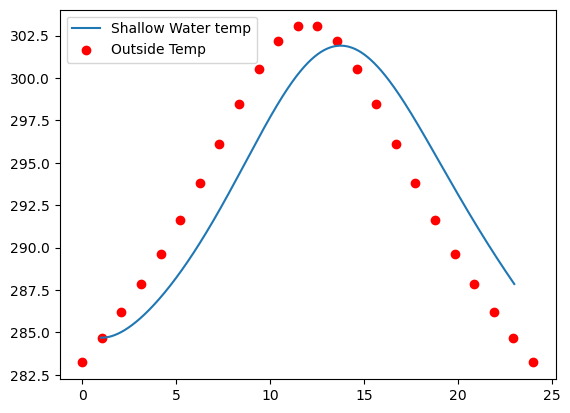

In [61]:
plt.plot(times, sol, label='Shallow Water temp')
plt.scatter(t_m, temp_m, color='r', label='Outside Temp')
plt.legend()

# Statistics

**Example 1**: $\beta$ distribution

$$ f(x; a, b) = \frac{\Gamma(a+b)x^{a-1}(1-x)^{b-1}}{\Gamma(a)\Gamma(b)} \hspace{20mm} 0 \leq x \leq 1$$

In [62]:
from scipy.stats import beta

Basic Statistics

In [63]:
a, b = 2.5, 3.1
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

Probability Distribution Plotting:

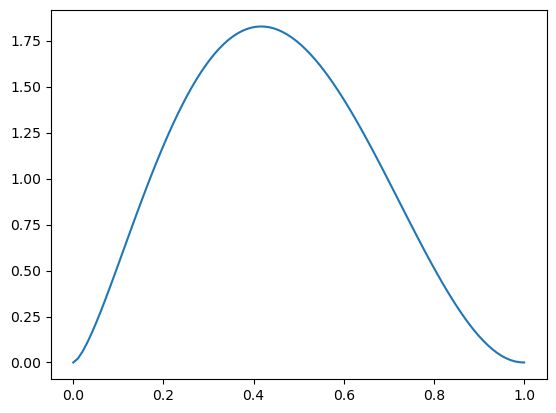

In [64]:
x = np.linspace(beta.ppf(0, a, b), beta.ppf(1, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

Generating Random Variables:

In [65]:
r = beta.rvs(a, b, size=10)
r

array([0.76412721, 0.52746849, 0.31480975, 0.61703025, 0.88054632,
       0.46037142, 0.40646476, 0.46832649, 0.13232398, 0.46820171])

**Example 2**: Gaussian Distribution

$$ f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \text{exp}\left(-\frac{(x-\mu)^2}{\sigma^2} \right) \hspace{20mm} -\infty < x \leq \infty $$

In [66]:
from scipy.stats import norm

In [67]:
mu = 1
sigma = 2
mean, var = norm.stats(loc=mu, scale=sigma, moments='mv')

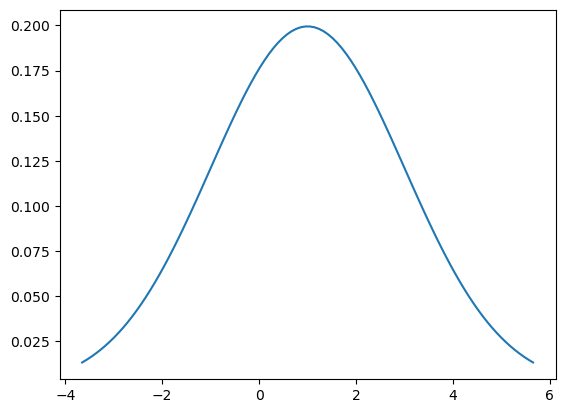

In [68]:
x = np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)
plt.plot(x, norm.pdf(x, mu, sigma))